In [0]:
import pandas as pd
import seaborn as sns

# a package for stats and regression
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

# a mathematical package
import numpy as np

# a package for building many model (but less stats oriented), including some utility tools
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

block = pd.read_csv('blockbusters3.csv')
block.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,Domestic_gross,Domestic_gross_MN,year
0,Fantasy,Adventure,Action,7.9,162,1,PG-13,20th Century Fox,Avatar,2749064328,2749,2009
1,Sci-Fi,Adventure,Action,8.2,143,1,PG-13,Walt Disney Pictures,The Avengers,1518594910,1519,2012
2,Thriller,Fantasy,Adventure,8.1,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,1341511219,1342,2011
3,Comedy,Animation,Adventure,7.7,102,1,PG,Walt Disney Pictures,Frozen,1274219009,1274,2013
4,Sci-Fi,Adventure,Action,7.3,130,2,PG-13,Walt Disney Pictures,Iron Man 3,1215439994,1215,2013


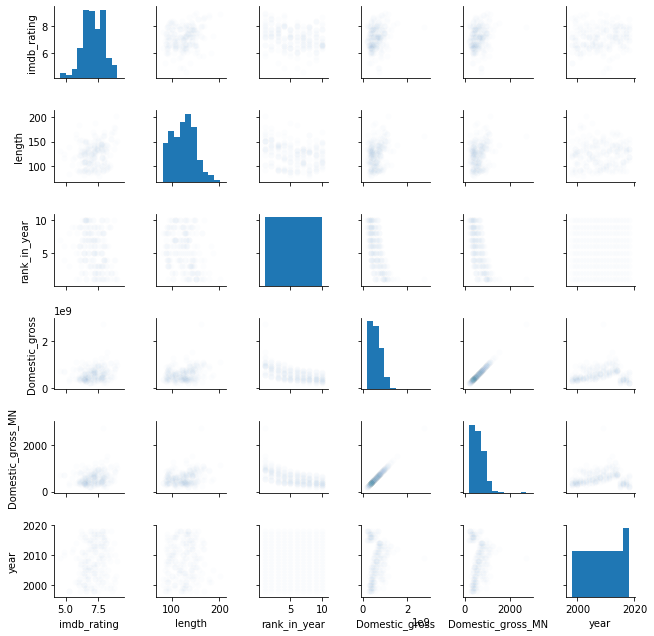

In [0]:
sns.pairplot(block, plot_kws=dict(linewidth=0, alpha = 0.01), height = 1.5)

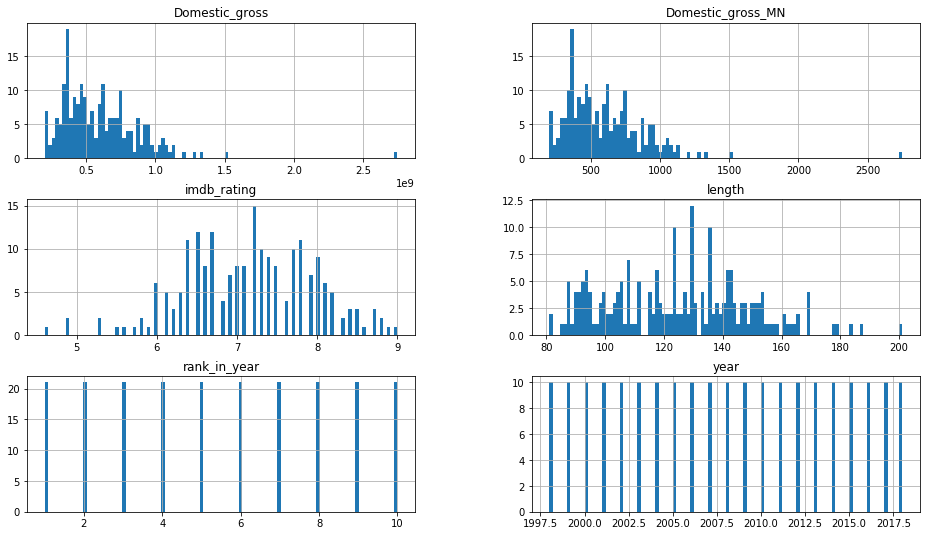

In [0]:
block.hist(bins=100, figsize= (16,9))
plt.show()

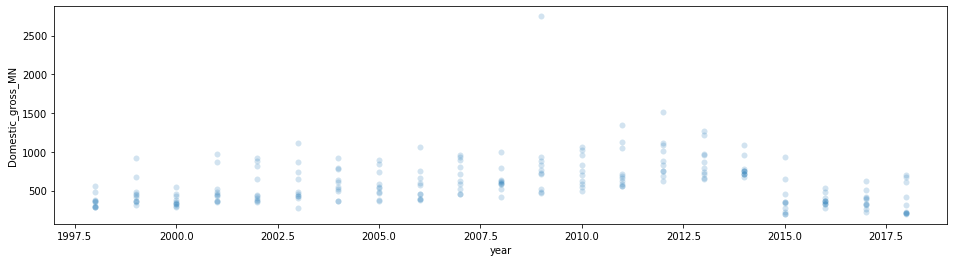

In [0]:
fig,ax = plt.subplots(figsize=(16,4))
sns.scatterplot (x = 'year', y = 'Domestic_gross_MN', data = block , alpha = 0.2 , linewidth = 0)

What we can see here is that with the dots transparency shows more information. There is a significant drop of domestic gross from 2013 until 2015, then followed by a stagnation. 

# Range Distribution: IMDB Rating

Here, we wanted to start giving a range for IMDB ratings in order to compare the relation of domestic gross with the imdb ratings, as well as how imdb ratings have changed over the years.

In [0]:
bins = [4.5, 5, 5.5, 6 , 6.5 , 7 , 7.5 , 8 , 8.5 , 9]
block['imdb_rating_range'] = pd.cut(block['imdb_rating'], bins, right = False)
block.head() # let's look at the new dataframe

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,Domestic_gross,Domestic_gross_MN,year,imdb_rating_range
0,Fantasy,Adventure,Action,7.9,162,1,PG-13,20th Century Fox,Avatar,2749064328,2749,2009,"[7.5, 8.0)"
1,Sci-Fi,Adventure,Action,8.2,143,1,PG-13,Walt Disney Pictures,The Avengers,1518594910,1519,2012,"[8.0, 8.5)"
2,Thriller,Fantasy,Adventure,8.1,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,1341511219,1342,2011,"[8.0, 8.5)"
3,Comedy,Animation,Adventure,7.7,102,1,PG,Walt Disney Pictures,Frozen,1274219009,1274,2013,"[7.5, 8.0)"
4,Sci-Fi,Adventure,Action,7.3,130,2,PG-13,Walt Disney Pictures,Iron Man 3,1215439994,1215,2013,"[7.0, 7.5)"


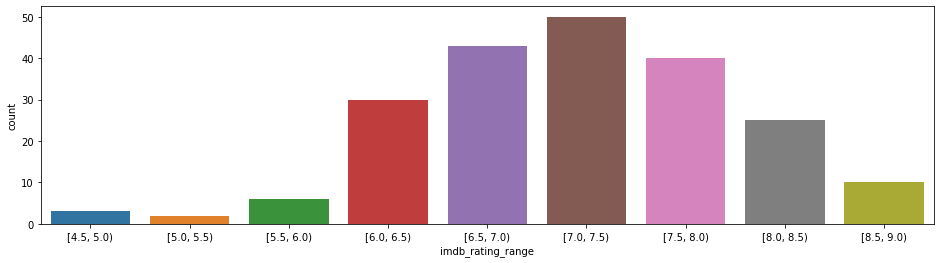

In [0]:
fig,ax = plt.subplots(figsize=(16,4))
sns.countplot(block['imdb_rating_range'])

Here, we are simply visualizing the range of imdb ratings, with the lowest being 4.6 and highest is 9.0 .

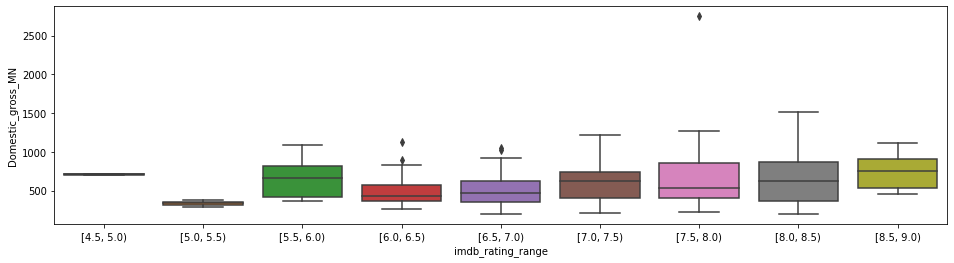

In [0]:
fig,ax = plt.subplots(figsize=(16,4))
sns.boxplot (x = 'imdb_rating_range', y = 'Domestic_gross_MN', data = block)

In [0]:
block.corr()

,imdb_rating,length,rank_in_year,Domestic_gross,Domestic_gross_MN,year
imdb_rating,1.000000,0.226024,-0.237536,0.221933,0.221960,0.133581
length,0.226024,1.000000,-0.270588,0.283955,0.283976,0.046392
rank_in_year,-0.237536,-0.270588,1.000000,-0.604619,-0.604641,0.000000
Domestic_gross,0.221933,0.283955,-0.604619,1.000000,1.000000,0.098835
Domestic_gross_MN,0.221960,0.283976,-0.604641,1.000000,1.000000,0.098904
year,0.133581,0.046392,0.000000,0.098835,0.098904,1.000000


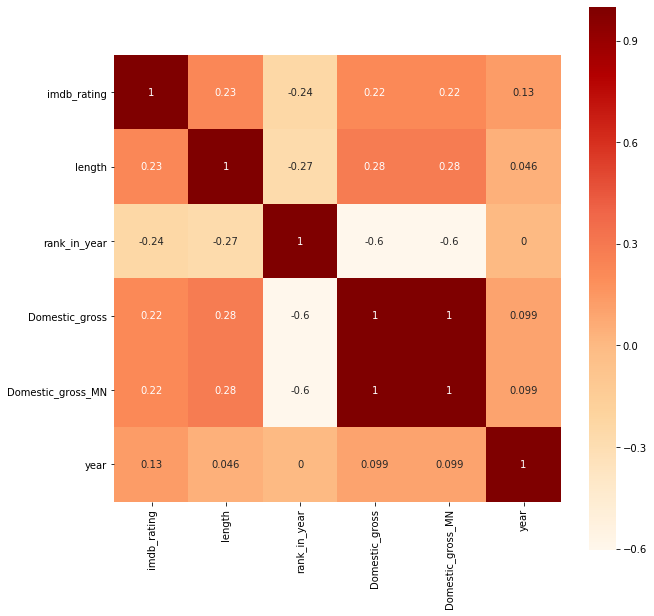

In [0]:
plt.figure(figsize=(10,10)) 
sns.heatmap(block.corr(), annot=True,cmap='OrRd',square=True) 

In our industry analysis, the correlation part is a useful way to see that the present variables we are analyzing have no consistent and relevant correlation. Highest positive correlation is 0.28 and highest negative correlation is -0.6.

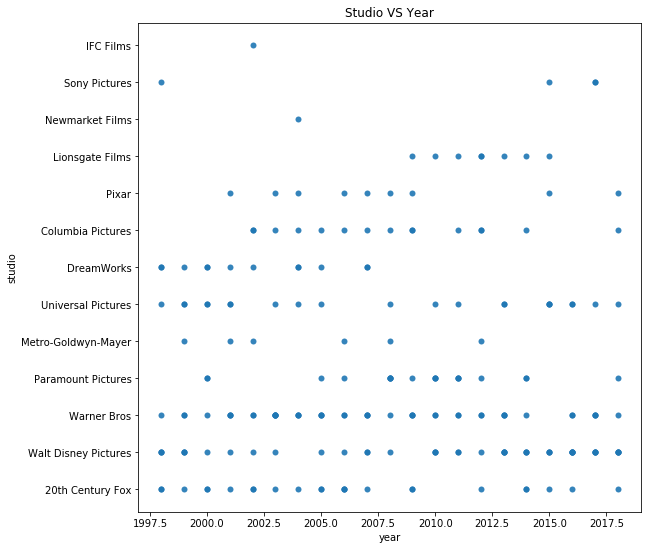

In [0]:
fig,ax1 = plt.subplots(figsize=(9,9))
sns.scatterplot(x='year', y= 'studio', data= block, alpha= 0.9, linewidth=0)
ax1.set_title('Studio VS Year')
plt.show()

There was the just one movie in the top 10 produced by IFC Films studio in 2002.

Warner Bros have been the most consistent in producing highly ranked movies unlike IFC Films or Sony Pictures and Newmarket Films.

Another finding is that Paramount Pictures did not produce one highly ranked movie between 2000 and 2005.

Plus, since 2007, DreamWorks studio have not produced a highly ranked movie. 

Only 6 studios produced movies that were part of the top 10 between 2011 and 2012 : Warner Bros, Columbia Pictures, Lionsgate Film, Paramount Pictures, Universal Pictures and Walt Disney Pictures.

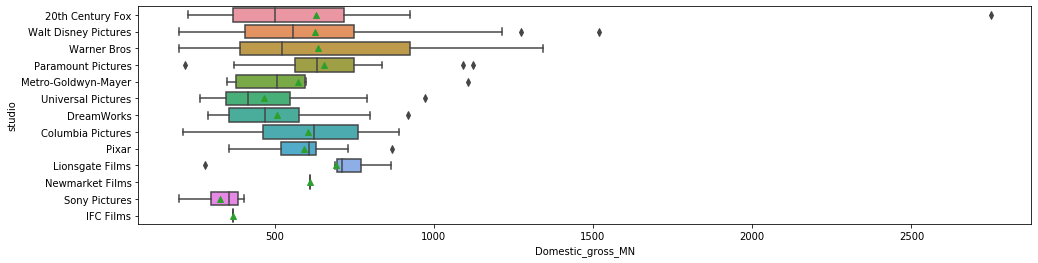

In [0]:
fig,ax = plt.subplots(figsize=(16,4))
sns.boxplot(x='Domestic_gross_MN', y='studio', data= block, showmeans= True )

We can do some conclusions regarding the graph "Studio VS Domestic Gross MN".

"Avatar" had the highest domestic gross with $2749 MN and was produced by 20th Century Fox.

"A star is born" was produced by Warner Bros and had the lowest domestic gross with $200 MN.

However, another least grossed film was "Spectre", produced by Sony Pictures at $200 MN.


**Studio V/S Rank**

Text(0.5, 1.0, 'Studio versus Rank')

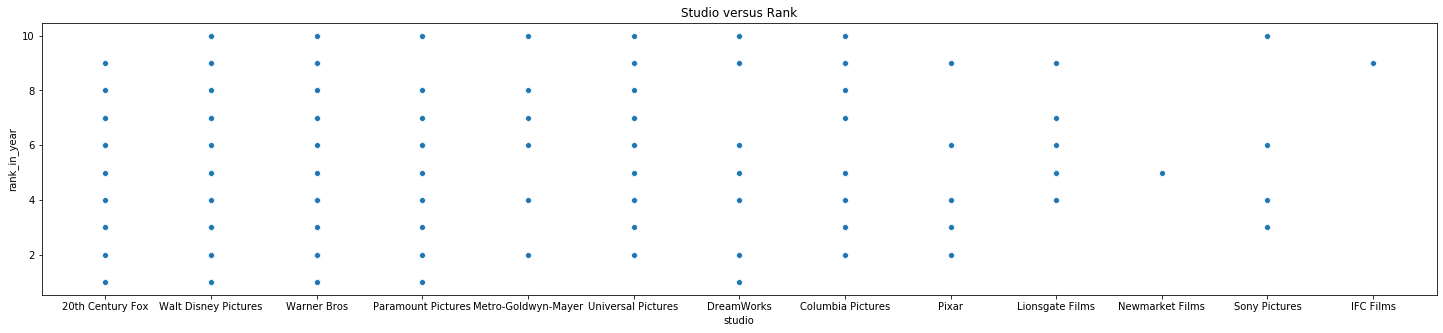

In [0]:
plt.figure(figsize=(25,5))
ax1 = sns.scatterplot(x="studio", y="rank_in_year", data=block, alpha=1)
ax1.set_title('Studio versus Rank')

Here, we have the analysis of Studio V/S Rank from last 20 years. We have considered top 10 movies from each year. With the above scatterplot we can see that there are few studios (such as IFC Films and Newmarket Films) which are not doing that great compared to others. This plot also shows how widespread the raking of a studio could get (for eg. Walt disney). 

**Studio V/S Rating**


Text(0.5, 1.0, 'Studio versus Rating')

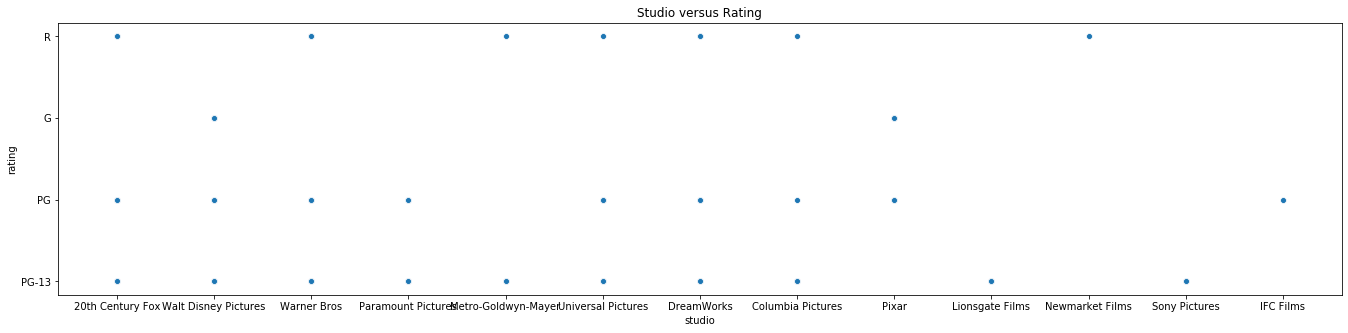

In [0]:
plt.figure(figsize=(23,5))
ax1 = sns.scatterplot(x="studio", y="rating", data=block, alpha=1)
ax1.set_title('Studio versus Rating')

With the above plot we can see how few studios focus on particular audiences (for eg. Sony Pictures) and few are widespread (for eg. Disney). But due to limited data that we have (top 10 movies from each year), we cannot come to a proper conclusion as there might be movies from studios that are targeted differently and did not make it to top 10. 

# Range Distribution: Domestic Gross (millions)

In [0]:
bins = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 2600, 2800]
block['Domestic_gross_MN_range'] = pd.cut(block['Domestic_gross_MN'], bins, right = False)
block.head() 

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,Domestic_gross,Domestic_gross_MN,year,imdb_rating_range,Domestic_gross_MN_range
0,Fantasy,Adventure,Action,7.9,162,1,PG-13,20th Century Fox,Avatar,2749064328,2749,2009,"[7.5, 8.0)","[2600, 2800)"
1,Sci-Fi,Adventure,Action,8.2,143,1,PG-13,Walt Disney Pictures,The Avengers,1518594910,1519,2012,"[8.0, 8.5)","[1400, 1600)"
2,Thriller,Fantasy,Adventure,8.1,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,1341511219,1342,2011,"[8.0, 8.5)","[1200, 1400)"
3,Comedy,Animation,Adventure,7.7,102,1,PG,Walt Disney Pictures,Frozen,1274219009,1274,2013,"[7.5, 8.0)","[1200, 1400)"
4,Sci-Fi,Adventure,Action,7.3,130,2,PG-13,Walt Disney Pictures,Iron Man 3,1215439994,1215,2013,"[7.0, 7.5)","[1200, 1400)"


Sub plot - Range Distribution: Domestic Gross (millions)

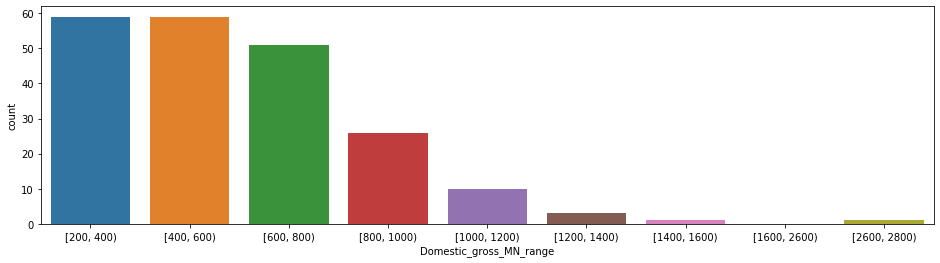

In [0]:
fig,ax = plt.subplots(figsize=(16,4))
sns.countplot(block['Domestic_gross_MN_range'])

59 movies within the range of **200 to 400**


59 movies within the range of **400 to 600**

51 movies within the range of **600 to 800**

26 movies within the range of **800 to 100**

10 movies within the range of **1000 to 1200**

3 movies within the range of **1200 to 1400**

2 movies within the range of **1400 and 1600.**


Box plots: IMDb rating and Domestic Gross (millions)

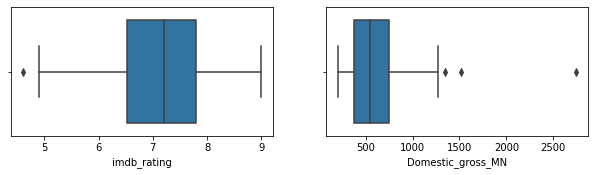

In [0]:
block_num = block[['imdb_rating', 'Domestic_gross_MN']] 
fig,ax = plt.subplots(2,0, figsize=(16,9)) 
for i in range (0, len(block_num.columns)): 
  plt.subplot(331+i) 
  sns.boxplot(block_num.iloc[:,i])
plt.subplots_adjust(hspace=0.4) 
plt.show()

IMDb rating boxplot: **80-90%** of the values goes from 4.9 til 9. **50%** of the values range from 6.5 to 7.7 (estimate). The **outlier** represents 4.6 IMDb rating. 

Domestic Gross (millions) boxplot: **80-90%** of the values go from 200 million up to 1274 million. **50%** of the values go from 350 million up to 750 million.
There are three (3) **outliers** which represent 1342, 1519 and 2749 millions. 

# Qualitative data

**Genres** - Main Genre, Genre 2 and 3

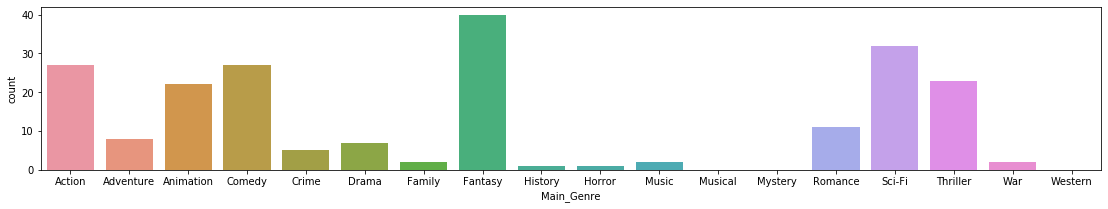

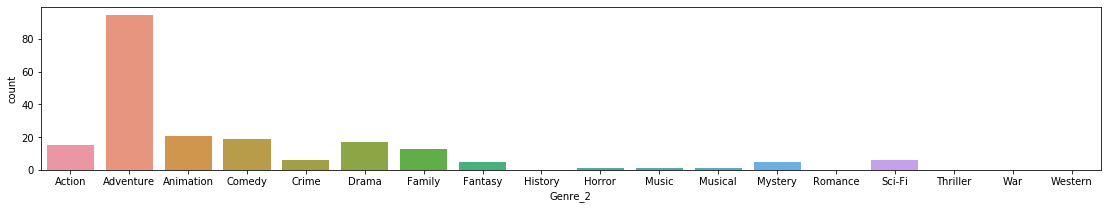

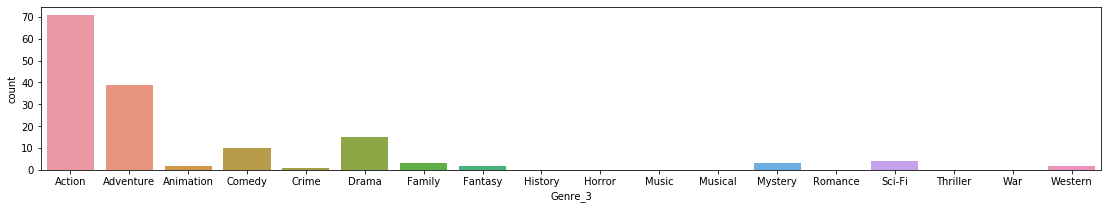

In [0]:
order_genre = ['Action','Adventure','Animation','Comedy','Crime','Drama','Family', 'Fantasy','History','Horror','Music', 'Musical', 'Mystery','Romance','Sci-Fi','Thriller','War', 'Western']

# Then feed this list as an argument of countplot
plt.figure(figsize=(19,3))
sns.countplot(block['Main_Genre'], order = order_genre)

plt.figure(figsize=(19,3))
sns.countplot(block['Genre_2'], order = order_genre)

plt.figure(figsize=(19,3))
sns.countplot(block['Genre_3'], order = order_genre)

plt.show()

**Main_Genre** doesn´t include Musical, Mystery and Western genres.

**Genre_2** doesn´t include History, Romance, Thriller, War, Western genres.

**Genre_3** doesn´t include History, Horror, Music, Musical, Romance, Thriller, War genres.

After analyzing all genres together, the following can be concluded: 

There are 142 movies with adventure genre, 113 action, 56 comedy, 53 animation, 47 fantasy, 42 sci-fi, 39 drama, 23 thriller, 18 family, 12 crime, 11 romance, 8 mystery, 3 music, 2 horror, 2 war, 2 western, 1 history and 1 musical. 

Most of the movies have 3 genres, 53 movies have two genres, and only 5 movies have only 1 genre.

**Studio**

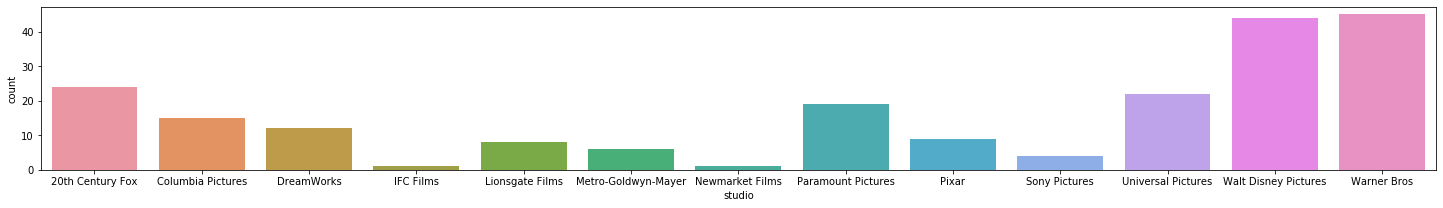

In [0]:
order_studio = ['20th Century Fox','Columbia Pictures','DreamWorks','IFC Films','Lionsgate Films','Metro-Goldwyn-Mayer','Newmarket Films', 'Paramount Pictures','Pixar','Sony Pictures','Universal Pictures', 'Walt Disney Pictures','Warner Bros']

# Then feed this list as an argument of countplot
plt.figure(figsize=(25,3))
sns.countplot(block['studio'], order = order_studio)

plt.show()

**See also Table 2 from Final Exam Report.**

There are 24 movies produced by **20th Century Fox**, 15 by **Columbia Pictures**, 12 by **DreamWorks**, 1 by **IFC Films**, 8 by **Lionsgate Films** (in which all are Twilight Saga and Hunger Games films), 6 from **Metro-Goldwyn-Mayer**, 1 from **Newmarket Films**, 19 produced by **Paramount Films**, 9 produced by **Pixar** (in which most of them are Adventure/Animation movies), 4 by **Sony Pictures**, 22 by **Universal Pictures**, 44 by **Walt Disney Pictures** and 45 by **Warner Bros**.

# IMDb rating vs Studio vs Domestic Gross

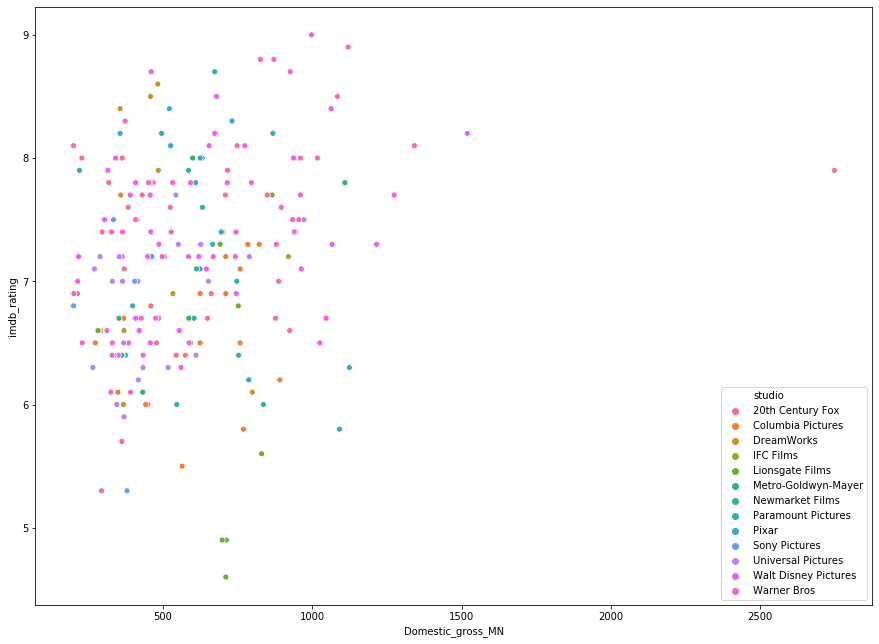

In [0]:
fig,ax = plt.subplots(figsize=(15,11))
sns.scatterplot (x="Domestic_gross_MN", y="imdb_rating", data=block, hue = "studio", hue_order= order_studio)
plt.show()

The IMDb rating range from 4.6 to 9. Some of our main findings are:


45 movies produced by Warner Bros have an IMDb rating between 6.1 and 9.

9 movies produced by Pixar have an IMDb rating between 7.2 to 8.4.

3 movies produced by Lionsgate Films have an IMDb rating less than 5.

1 movie produced by IFC Films has an IMDb rating of 6.6

1 movie produced by Newmarket Films has an IMDb rating of 7.1

44 movies produced by Walt Disney Pictures, IMDb rating range from 6 to 8.5. 

**See also Table 2 in Final Exam Report**


# Main Genre vs Domestic Gross vs IMDb rating

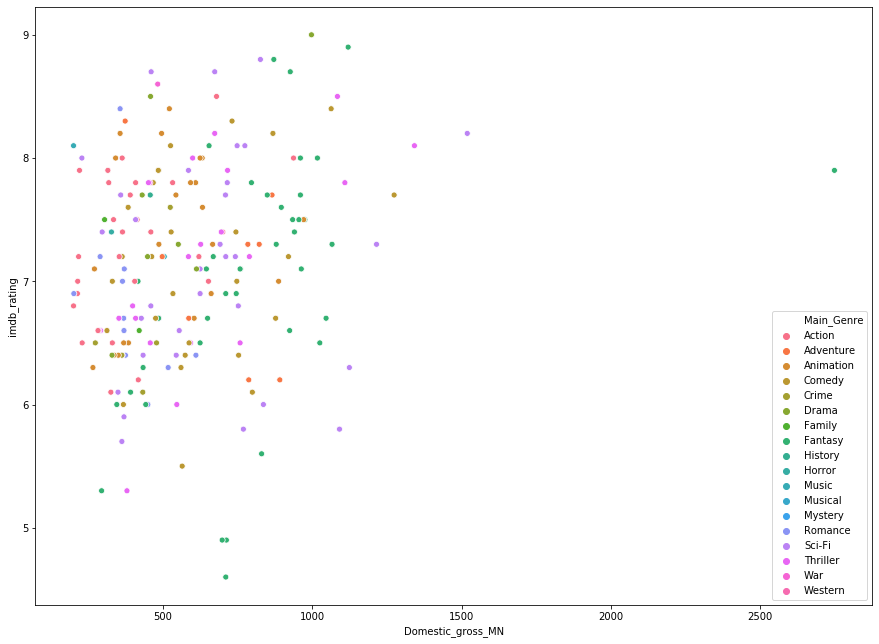

In [0]:
fig,ax = plt.subplots(figsize=(15,11))
sns.scatterplot (x="Domestic_gross_MN", y="imdb_rating", data=block, hue = "Main_Genre", hue_order= order_genre)
plt.show()

On this graph, it can be seen how all genres are all over the place with different IMDb ratings. Most of them are concentrated on the left upper side of the graph, meaning that most of the IMDb ratings are within the range of 6 to 8,and domestic gross within the range of 200 to 1250 (estimate). 

# Domestic Gross vs Studio vs Year

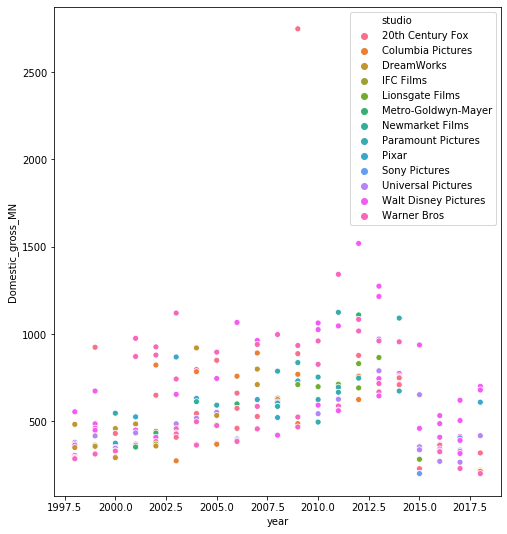

In [0]:
fig,ax = plt.subplots(figsize=(8,9))
sns.scatterplot (x="year", y="Domestic_gross_MN", data=block, hue = "studio", hue_order= order_studio)

On this graph, it can be seen how most of the studios increased their domestic gross (in millions) from 1998 to 2014. Later, between 2014 and 2015, it can be seen how domestic gross has declined. Between 2015 and 2018, all studios had less than 1000 million in domestic gross, in which most of them had less than 500 million. 

DreamWorks was bought by **NBCUniversal** in 2016. In this data, there are no movies produced by DreamWorks between 2015 and 2018. 

Newmarket Films library was sold to **AMBI group** in 2015. Therefore, this is the reason why no films from this studio appear between 2015 and 2018. 

Lastly, there are no movies produced by IFC Films and Metro-Goldwyn-Mayer between 2015 and 2018.

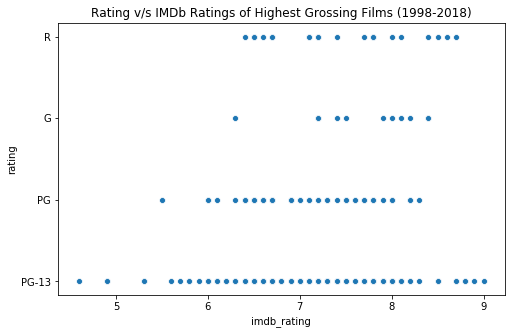

In [0]:
fig,ax = plt.subplots(figsize=(8,5))
ax1 = sns.scatterplot (x = 'imdb_rating', y = 'rating', data = block)
ax1.set_title('Rating v/s IMDb Ratings of Highest Grossing Films (1998-2018)')
plt.show()

From the above plot, we observed that most of the highest-rated IMDB movies (ranging from 8 to 9) fall under the PG-13 rating category. However, the lowest IMDB rated movie fall under the same maturity rating, thus the deviation is the largest

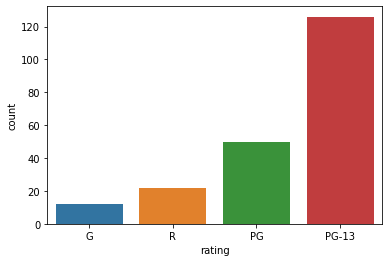

In [0]:
order_rating = ['G','R','PG','PG-13']
sns.countplot(block['rating'], order= order_rating)

From the above plot, we observed that the highest count of movies fall under the PG-13 maturity rating category. However, the lowest count fall under the G category. Thus it's concluded that the top-ranked movies from 1998 to 2018 are under the PG-13 maturity rating category.

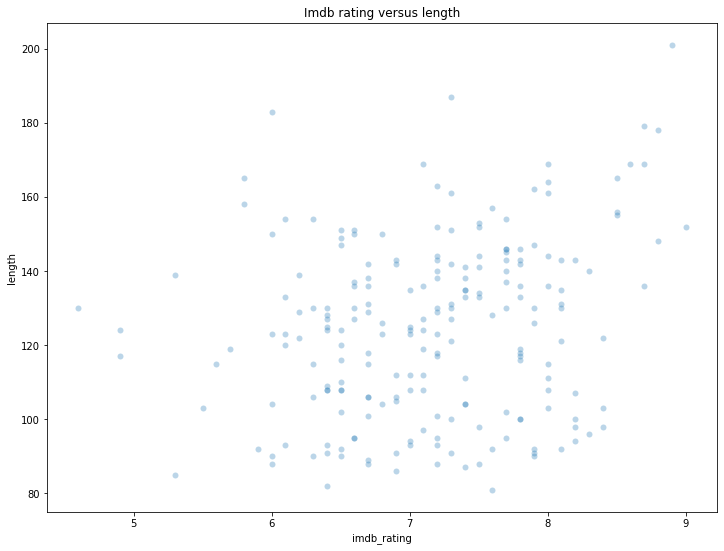

In [0]:
fig,ax = plt.subplots(figsize=(12,9))
ax1 = sns.scatterplot(x='imdb_rating', y='length', data= block, alpha= .3, linewidth=0)
ax1.set_title('Imdb rating versus length')
plt.show()

From the above plot, we observed that the highest IMDB rated movie with a rating of 9, is around 150 minutes of length and the lowest IMDB rated film with a rating of 4.6 has a length of around 130 minutes.The longest film in the plot which is slightly more than 200 minutes and the shortest film is 81 minutes long with an IMDB rating of 7.7.

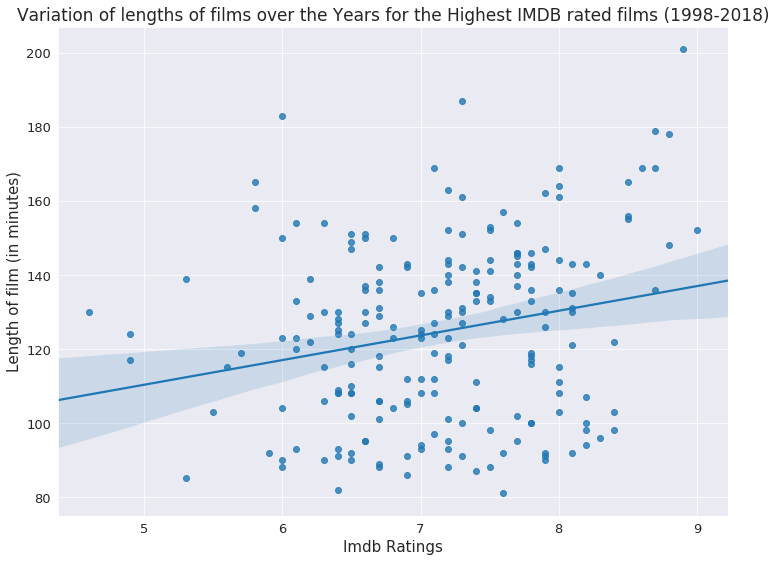

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,9))
sns.set_style('darkgrid')

fig = sns.regplot(x="imdb_rating", y="length", data=block)

plt.ylabel('Length of film (in minutes)', fontsize = 15)
plt.xlabel('Imdb Ratings', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Variation of lengths of films over the Years for the Highest IMDB rated films (1998-2018)', fontsize = 17)
plt.show()

Throughout the whole graph a common trend can be seen which is that, in the higher rating range i.e. 8 to 9, the variation of length is the largest. For some films, a large variation can be seen when ratings come to a range of 6 to 7 but the variation is less as compared to the previous range. The variation decreases further when the ratings come below 5.

# Adding const

In [0]:
block['const']=1
block.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,Domestic_gross,Domestic_gross_MN,year,imdb_rating_range,Domestic_gross_MN_range,const
0,Fantasy,Adventure,Action,7.9,162,1,PG-13,20th Century Fox,Avatar,2749064328,2749,2009,"[7.5, 8.0)","[2600, 2800)",1
1,Sci-Fi,Adventure,Action,8.2,143,1,PG-13,Walt Disney Pictures,The Avengers,1518594910,1519,2012,"[8.0, 8.5)","[1400, 1600)",1
2,Thriller,Fantasy,Adventure,8.1,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,1341511219,1342,2011,"[8.0, 8.5)","[1200, 1400)",1
3,Comedy,Animation,Adventure,7.7,102,1,PG,Walt Disney Pictures,Frozen,1274219009,1274,2013,"[7.5, 8.0)","[1200, 1400)",1
4,Sci-Fi,Adventure,Action,7.3,130,2,PG-13,Walt Disney Pictures,Iron Man 3,1215439994,1215,2013,"[7.0, 7.5)","[1200, 1400)",1


In [0]:
block_dummy = pd.get_dummies(block['studio'])
block_dummy.head()




,20th Century Fox,Columbia Pictures,DreamWorks,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
block_dummy1 = pd.get_dummies(block['rating'])
block_dummy1.head()




,G,PG,PG-13,R
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [0]:
block_revised = pd.concat([block, block_dummy, block_dummy1], axis=1) # concat basically concatenate two table. 
                                                # Axis = 1 specifies you concatenate columns together
block_revised.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,Domestic_gross,Domestic_gross_MN,year,imdb_rating_range,Domestic_gross_MN_range,const,20th Century Fox,Columbia Pictures,DreamWorks,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros,G,PG,PG-13,R
0,Fantasy,Adventure,Action,7.9,162,1,PG-13,20th Century Fox,Avatar,2749064328,2749,2009,"[7.5, 8.0)","[2600, 2800)",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Sci-Fi,Adventure,Action,8.2,143,1,PG-13,Walt Disney Pictures,The Avengers,1518594910,1519,2012,"[8.0, 8.5)","[1400, 1600)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,Thriller,Fantasy,Adventure,8.1,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,1341511219,1342,2011,"[8.0, 8.5)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,Comedy,Animation,Adventure,7.7,102,1,PG,Walt Disney Pictures,Frozen,1274219009,1274,2013,"[7.5, 8.0)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,Sci-Fi,Adventure,Action,7.3,130,2,PG-13,Walt Disney Pictures,Iron Man 3,1215439994,1215,2013,"[7.0, 7.5)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(block_revised[['rank_in_year', 'year', 'const','20th Century Fox','Columbia Pictures',	'DreamWorks',	'IFC Films',	'Lionsgate Films',	'Metro-Goldwyn-Mayer',	'Newmarket Films',	'Paramount Pictures'	,'Pixar',	'Sony Pictures'	,'Universal Pictures',	'Walt Disney Pictures',	'Warner Bros',	'G'	,'PG',	'PG-13',	'R']],
                                           block_revised[ 'Domestic_gross_MN'],test_size = 0.1, random_state=2)
block_revised.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,Domestic_gross,Domestic_gross_MN,year,imdb_rating_range,Domestic_gross_MN_range,const,20th Century Fox,Columbia Pictures,DreamWorks,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros,G,PG,PG-13,R
0,Fantasy,Adventure,Action,7.9,162,1,PG-13,20th Century Fox,Avatar,2749064328,2749,2009,"[7.5, 8.0)","[2600, 2800)",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Sci-Fi,Adventure,Action,8.2,143,1,PG-13,Walt Disney Pictures,The Avengers,1518594910,1519,2012,"[8.0, 8.5)","[1400, 1600)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,Thriller,Fantasy,Adventure,8.1,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,1341511219,1342,2011,"[8.0, 8.5)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,Comedy,Animation,Adventure,7.7,102,1,PG,Walt Disney Pictures,Frozen,1274219009,1274,2013,"[7.5, 8.0)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,Sci-Fi,Adventure,Action,7.3,130,2,PG-13,Walt Disney Pictures,Iron Man 3,1215439994,1215,2013,"[7.0, 7.5)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
x_train.head()

,rank_in_year,year,const,20th Century Fox,Columbia Pictures,DreamWorks,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros,G,PG,PG-13,R
112,9,2008,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
24,2,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
203,6,2018,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
29,3,2007,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
28,1,2005,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [0]:
y_train.head()

112    521
24     934
203    220
29     891
28     896
Name: Domestic_gross_MN, dtype: int64

In [0]:
X_2 = x_train
Y_2 = y_train
lm_2 = sm.OLS(Y_2, X_2).fit()

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:      Domestic_gross_MN   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     8.152
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           2.45e-14
Time:                        14:57:56   Log-Likelihood:                -1288.8
No. Observations:                 189   AIC:                             2612.
Df Residuals:                     172   BIC:                             2667.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
rank_in_year           -60.8804 

In [0]:

pred_2 = lm_2.predict(x_test)
print(pred_2)


44      835.183491
200     364.785566
207     345.933277
140     618.280180
41      662.074496
161    1137.370413
25      933.367358
10      777.037932
13      738.222909
143     237.630742
135     438.763098
23      838.009284
158     466.648165
169     398.993198
71      388.788082
118     465.040190
35      753.874301
188     649.840544
182     355.128705
139     383.185824
201     487.062929
dtype: float64


In [0]:
rmse(pred_2,y_test)

235.97377220643983

In [0]:
block_revised['pred_lm2'] = lm_2.predict(block_revised[['rank_in_year', 'year', 'const','20th Century Fox','Columbia Pictures',	'DreamWorks',	'IFC Films',	'Lionsgate Films',	'Metro-Goldwyn-Mayer',	'Newmarket Films',	'Paramount Pictures'	,'Pixar',	'Sony Pictures'	,'Universal Pictures',	'Walt Disney Pictures',	'Warner Bros',	'G'	,'PG',	'PG-13',	'R']])

block_revised['residual_lm2'] = block_revised['pred_lm2'] - block_revised['Domestic_gross_MN']

block_revised.head()
                                           

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,Domestic_gross,Domestic_gross_MN,year,imdb_rating_range,Domestic_gross_MN_range,const,20th Century Fox,Columbia Pictures,DreamWorks,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros,G,PG,PG-13,R,pred_lm2,residual_lm2
0,Fantasy,Adventure,Action,7.9,162,1,PG-13,20th Century Fox,Avatar,2749064328,2749,2009,"[7.5, 8.0)","[2600, 2800)",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,963.304725,-1785.695275
1,Sci-Fi,Adventure,Action,8.2,143,1,PG-13,Walt Disney Pictures,The Avengers,1518594910,1519,2012,"[8.0, 8.5)","[1400, 1600)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,817.685500,-701.314500
2,Thriller,Fantasy,Adventure,8.1,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,1341511219,1342,2011,"[8.0, 8.5)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,994.338711,-347.661289
3,Comedy,Animation,Adventure,7.7,102,1,PG,Walt Disney Pictures,Frozen,1274219009,1274,2013,"[7.5, 8.0)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,819.427065,-454.572935
4,Sci-Fi,Adventure,Action,7.3,130,2,PG-13,Walt Disney Pictures,Iron Man 3,1215439994,1215,2013,"[7.0, 7.5)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,763.579723,-451.420277


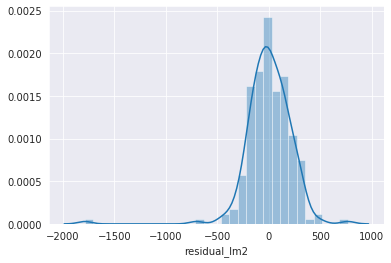

In [0]:
sns.distplot(block_revised['residual_lm2'], kde = True)

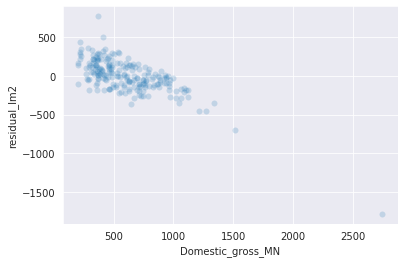

In [0]:
sns.scatterplot(x= 'Domestic_gross_MN', y = 'residual_lm2', data = block_revised, alpha=0.2,linewidth=0)

In [0]:
block_revised['logDomestic_gross_MN'] = np.log(block_revised['Domestic_gross_MN'])
block_revised.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,Domestic_gross,Domestic_gross_MN,year,imdb_rating_range,Domestic_gross_MN_range,const,20th Century Fox,Columbia Pictures,DreamWorks,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros,G,PG,PG-13,R,pred_lm2,residual_lm2,logDomestic_gross_MN
0,Fantasy,Adventure,Action,7.9,162,1,PG-13,20th Century Fox,Avatar,2749064328,2749,2009,"[7.5, 8.0)","[2600, 2800)",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,963.304725,-1785.695275,7.918992
1,Sci-Fi,Adventure,Action,8.2,143,1,PG-13,Walt Disney Pictures,The Avengers,1518594910,1519,2012,"[8.0, 8.5)","[1400, 1600)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,817.685500,-701.314500,7.325808
2,Thriller,Fantasy,Adventure,8.1,130,1,PG-13,Warner Bros,Harry Potter and the Deathly Hallows - Part 2,1341511219,1342,2011,"[8.0, 8.5)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,994.338711,-347.661289,7.201916
3,Comedy,Animation,Adventure,7.7,102,1,PG,Walt Disney Pictures,Frozen,1274219009,1274,2013,"[7.5, 8.0)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,819.427065,-454.572935,7.149917
4,Sci-Fi,Adventure,Action,7.3,130,2,PG-13,Walt Disney Pictures,Iron Man 3,1215439994,1215,2013,"[7.0, 7.5)","[1200, 1400)",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,763.579723,-451.420277,7.102499


In [0]:
x_test

,rank_in_year,year,const,20th Century Fox,Columbia Pictures,DreamWorks,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros,G,PG,PG-13,R
44,2,2008,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
200,9,2017,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
207,9,2015,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
140,6,2002,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
41,4,2007,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
161,9,2002,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
25,1,2002,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10,1,2006,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
13,2,2010,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
143,10,2008,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


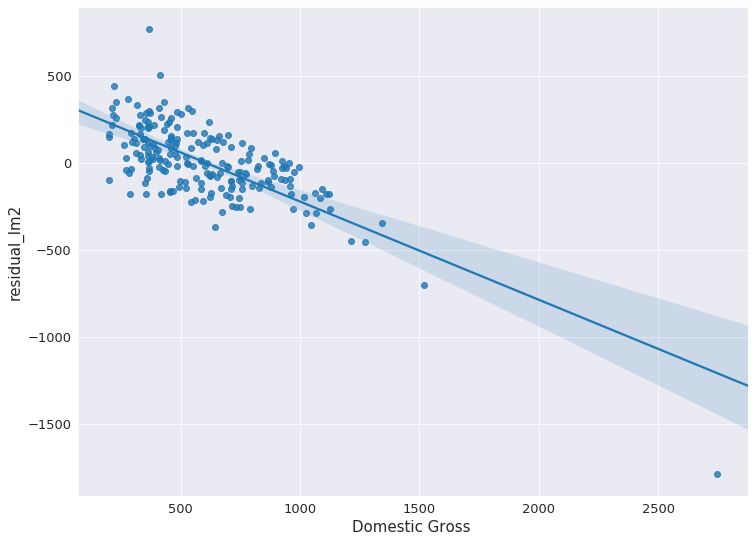

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,9))
sns.set_style('darkgrid')

fig = sns.regplot(x="Domestic_gross_MN", y="residual_lm2", data=block_revised)

plt.ylabel('residual_lm2', fontsize = 15)
plt.xlabel('Domestic Gross ', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

# **Lengths of Films over Years**

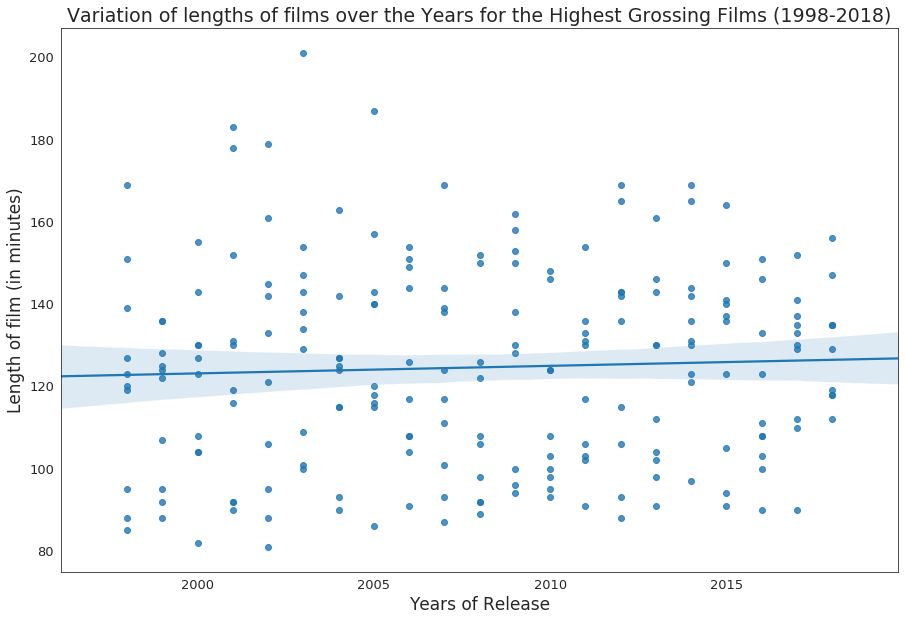

In [0]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
plt.figure(figsize = (15,10))
sns.set_style('white')

fig = sns.regplot(x="year", y="length", data=block)

plt.ylabel('Length of film (in minutes)', fontsize = 17)
plt.xlabel('Years of Release', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Variation of lengths of films over the Years for the Highest Grossing Films (1998-2018)', fontsize = 19)
plt.show()

From the above graph, the following conclusions can be drawn.

Though this conclusion is not based strongly or does not give us a robust result seeing at the spread of the data points, but we can see from the regression line that the average length of movies have increased over the years, though the slope of the line is very small.

# Length of Films over Domestic Gross

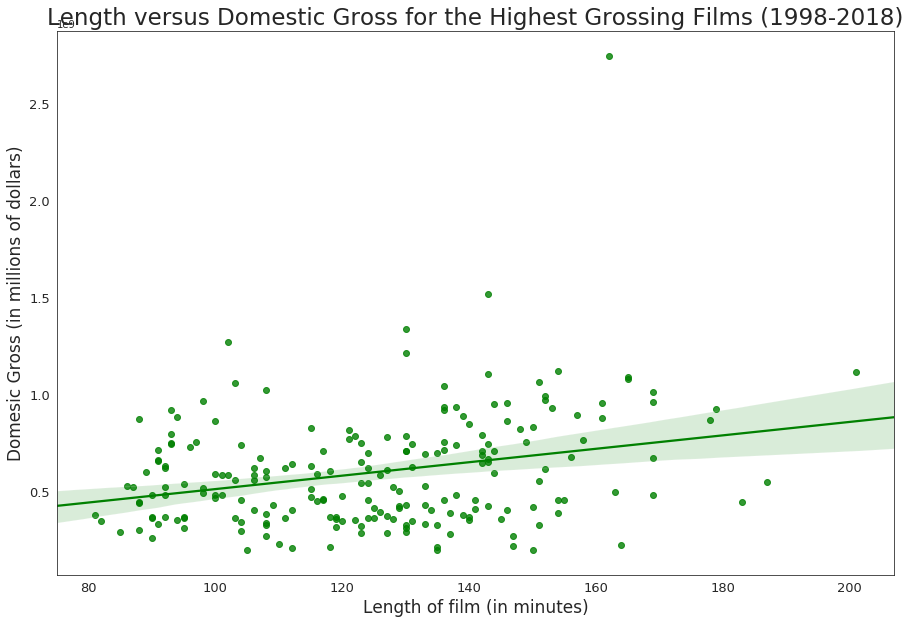

In [0]:
plt.figure(figsize = (15,10))
sns.set_style('white')

fig = sns.regplot(x="length", y="Domestic_gross", data=block, color='g')

plt.ylabel('Domesic Gross (in millions of dollars)', fontsize = 17)
plt.xlabel('Length of film (in minutes)', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Length versus Domestic Gross for the Highest Grossing Films (1998-2018)', fontsize = 23)
plt.show()

From the above graph, the following conclusions can be drawn.



1. As like our previous graph, though not extremely sturdy, it is seen that length is directly proportional to domestic_gross, which means, it is observed throughout the years that the more the length of the film, the more the film has grossed domestically.



# Domestic Gross over Maturity Ratings 

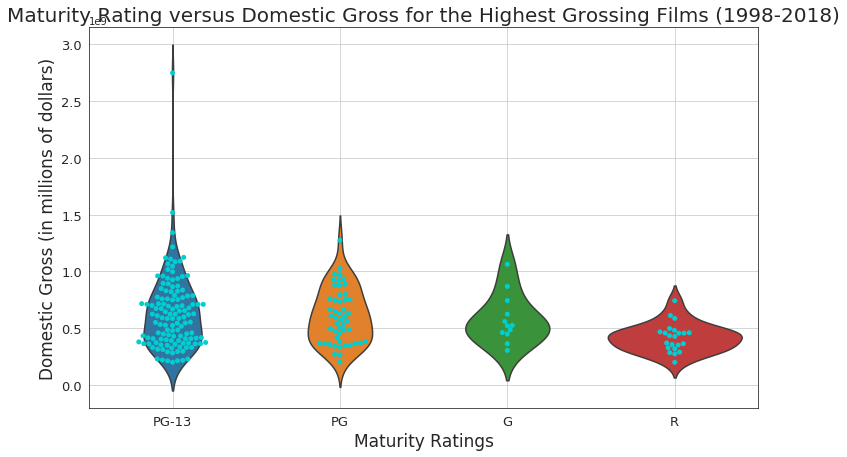

In [0]:
plt.figure(figsize = (12,7))
sns.set_style('white')

block.Domestic_gross = block.Domestic_gross.astype(float) #because violinplot needs one axis to be of float values.
ax = sns.violinplot(x="rating", y="Domestic_gross", data=block, inner = None) #inner=None to delete the middle line inside the violins. 
ax = sns.swarmplot(x="rating", y="Domestic_gross", data=block, color = '#00CED1', edgecolor = 'gray')

plt.ylabel('Domestic Gross (in millions of dollars)', fontsize = 17)
plt.xlabel('Maturity Ratings', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid(True)
plt.title('Maturity Rating versus Domestic Gross for the Highest Grossing Films (1998-2018)', fontsize = 20)
plt.show()

From the above graph, the following conclusions can be drawn.

*  PG-13 and G rated movies mostly earn around 400-450 million dollars the most, though this is not the case for all movies as the graph shows a few PG-13 films much more than that gross range and even the highest grossed movie among all the highest grossing movies in the entire period.
*   Both PG and R-rated films earn much less on an average than the other ratings with most grosses around 100-200 million dollars.


